In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_datos ="datasets/datos_sincorregir.csv"
datos = pd.read_csv(file_datos)
datos




,latitude,longitude,height,distance,sum_distance,slope,date,utm_x,utm_y,velocidad_gps,consumo_total,consumo_inst,timestamp,ds,velocidad
0,-3.476464,-79.169121,2321.3,32.045666,64.296855,0.000000,2017/08/15 12:08:38,703393.182957,9.615544e+06,57.89,3091.95,13.40,1.502817e+09,2.0,16.022833
1,-3.476668,-79.169327,2321.3,32.150962,96.447818,0.000000,2017/08/15 12:08:38,703370.246811,9.615522e+06,58.08,3091.95,13.60,1.502817e+09,0.0,inf
2,-3.476898,-79.169502,2321.3,32.028551,128.476369,0.000000,2017/08/15 12:08:40,703350.750075,9.615497e+06,58.28,3091.96,13.25,1.502817e+09,2.0,16.014276
3,-3.477153,-79.169647,2321.3,32.489600,160.965969,0.000000,2017/08/15 12:08:42,703334.581834,9.615468e+06,58.60,3091.97,13.65,1.502817e+09,2.0,16.244800
4,-3.477430,-79.169754,2321.3,32.870444,193.836413,0.000000,2017/08/15 12:08:44,703322.631750,9.615438e+06,59.17,3091.98,13.75,1.502817e+09,2.0,16.435222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,-3.987260,-79.202866,2059.3,7.982333,98955.777498,0.125277,2017/08/15 13:48:09,699527.834504,9.559063e+06,15.32,3102.46,0.65,1.502823e+09,2.0,3.991167
2545,-3.987273,-79.202805,2059.2,6.935654,98962.713153,-0.014418,2017/08/15 13:48:11,699534.606142,9.559062e+06,15.32,3102.46,0.65,1.502823e+09,2.0,3.467827
2546,-3.987276,-79.202782,2059.2,2.585885,98965.299037,0.000000,2017/08/15 13:48:14,699537.159842,9.559061e+06,0.04,3102.46,0.80,1.502823e+09,3.0,0.861962
2547,-3.987276,-79.202782,2059.2,0.010000,98965.309037,0.000000,2017/08/15 13:48:16,699537.159842,9.559061e+06,0.02,3102.46,0.80,1.502823e+09,2.0,0.005000


In [3]:
datos["velocidad_gps-ms"] = datos['velocidad_gps'] * 1000/3600
datos["next_vel"] = datos["velocidad_gps-ms"].shift(-1)

datos['aceleracion'] = ((datos["velocidad_gps-ms"] - datos["next_vel"])) / 2

In [4]:
datos.columns

Index(['latitude', 'longitude', 'height', 'distance', 'sum_distance', 'slope',
       'date', 'utm_x', 'utm_y', 'velocidad_gps', 'consumo_total',
       'consumo_inst', 'timestamp', 'ds', 'velocidad', 'velocidad_gps-ms',
       'next_vel', 'aceleracion'],
      dtype='object')

In [5]:
def est_energia(data, densidad_aire = 0.893, fr=0.008, rd=0.191, area_front=3.419, masa=3185, g=9.8, cd=0.5, rend_motor = 0.30, rend_trans = 0.9, LHV = 432000, densidad_diesel = 840 ):
    
    '''LHV en J/L = (43200 kJ/kg) x (1000 J/kJ) ÷ (0,84 kg/L) = 51428571.43 J/L '''
    
    Fd = (0.5) * densidad_aire * cd * area_front * (datos["velocidad_gps-ms"] ** 2)
    Rx = fr * masa * g * np.cos(np.degrees(np.arctan(datos['slope'])))
    Rg = masa * g *np.sin(np.degrees(np.arctan(datos['slope'])))
    Ri = masa * datos['aceleracion']
    
    datos['fd'] = Fd
    datos['Rx'] = Rx
    datos['Rg'] = Rg
    datos['Ri'] = Ri

    fx = Fd + Rx + Rg + Ri
    
    datos['fx'] = fx

    potencia_rueda = fx * datos["velocidad_gps-ms"]
    
    datos['potencia_rueda'] = potencia_rueda

    potencia_motor = potencia_rueda / (rend_motor * rend_trans)
    
    datos['potencia_motor'] = potencia_motor

    caudal_inst = potencia_motor / (LHV * densidad_diesel )

    datos['caudal_inst'] = caudal_inst * 3600

    return datos

In [6]:
432000

432000

In [7]:
datos_energia = est_energia(datos)
datos_energia

,latitude,longitude,height,distance,sum_distance,slope,date,utm_x,utm_y,velocidad_gps,...,next_vel,aceleracion,fd,Rx,Rg,Ri,fx,potencia_rueda,potencia_motor,caudal_inst
0,-3.476464,-79.169121,2321.3,32.045666,64.296855,0.000000,2017/08/15 12:08:38,703393.182957,9.615544e+06,57.89,...,16.133333,-0.026389,197.375238,249.704000,0.000000,-84.048611,363.030627,5837.734159,21621.237625,0.214496
1,-3.476668,-79.169327,2321.3,32.150962,96.447818,0.000000,2017/08/15 12:08:38,703370.246811,9.615522e+06,58.08,...,16.188889,-0.027778,198.672969,249.704000,0.000000,-88.472222,359.904747,5806.463250,21505.419443,0.213347
2,-3.476898,-79.169502,2321.3,32.028551,128.476369,0.000000,2017/08/15 12:08:40,703350.750075,9.615497e+06,58.28,...,16.277778,-0.044444,200.043596,249.704000,0.000000,-141.555556,308.192041,4989.286700,18478.839631,0.183322
3,-3.477153,-79.169647,2321.3,32.489600,160.965969,0.000000,2017/08/15 12:08:42,703334.581834,9.615468e+06,58.60,...,16.436111,-0.079167,202.246400,249.704000,0.000000,-252.145833,199.804566,3252.374327,12045.830842,0.119502
4,-3.477430,-79.169754,2321.3,32.870444,193.836413,0.000000,2017/08/15 12:08:44,703322.631750,9.615438e+06,59.17,...,16.641667,-0.102778,206.200021,249.704000,0.000000,-327.347222,128.556799,2112.973830,7825.829001,0.077637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,-3.987260,-79.202866,2059.3,7.982333,98955.777498,0.125277,2017/08/15 13:48:09,699527.834504,9.559063e+06,15.32,...,4.255556,0.000000,13.823025,163.400616,23602.279561,0.000000,23779.503202,101194.996958,374796.285031,3.718217
2545,-3.987273,-79.202805,2059.2,6.935654,98962.713153,-0.014418,2017/08/15 13:48:11,699534.606142,9.559062e+06,15.32,...,0.011111,2.122222,13.823025,169.246137,-22949.616255,6759.277778,-16007.269315,-68119.823865,-252295.643943,-2.502933
2546,-3.987276,-79.202782,2059.2,2.585885,98965.299037,0.000000,2017/08/15 13:48:14,699537.159842,9.559061e+06,0.04,...,0.005556,0.002778,0.000094,249.704000,0.000000,8.847222,258.551316,2.872792,10.639972,0.000106
2547,-3.987276,-79.202782,2059.2,0.010000,98965.309037,0.000000,2017/08/15 13:48:16,699537.159842,9.559061e+06,0.02,...,0.011111,-0.002778,0.000024,249.704000,0.000000,-8.847222,240.856801,1.338093,4.955901,0.000049


In [8]:
datos_energia_pos = datos_energia.loc[datos_energia['caudal_inst'] > 0]
datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
datos_energia_pos.dropna(inplace=True)
consumo_total_estimado = datos_energia_pos['caudal_inst'].sum()
consumo_total_estimado

/var/folders/5l/lkq4p7sx7v12lgqv9mwfy3nm0000gn/T/ipykernel_3031/938077076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/5l/lkq4p7sx7v12lgqv9mwfy3nm0000gn/T/ipykernel_3031/938077076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.dropna(inplace=True)


3214.526376043076

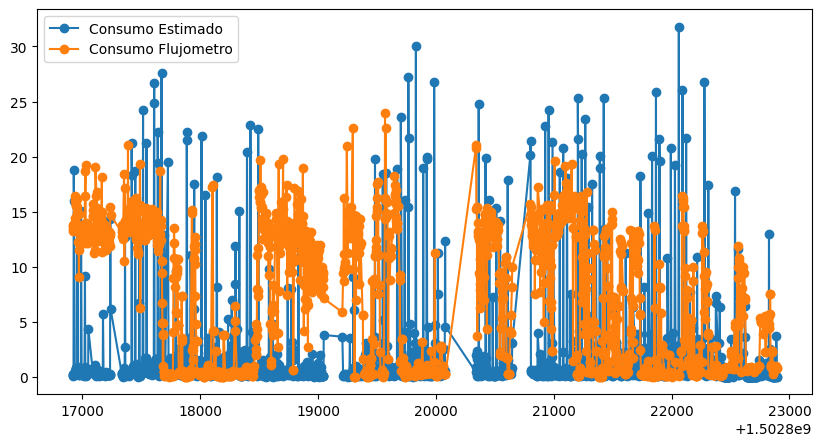

In [9]:

plt.figure(figsize=(10,5))
plt.plot(datos_energia_pos['timestamp'], datos_energia_pos['caudal_inst'],'-o',label='Consumo Estimado')
plt.plot(datos_energia_pos['timestamp'], datos_energia_pos['consumo_inst'], '-o',label='Consumo Flujometro')



plt.legend()
plt.show()

In [10]:
datos_energia_pos.to_csv('consumo_estimado_sin_corregir.csv', index=False)